In [1]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
x = np.linspace(1e-4, 1-1e-4, 100)

In [103]:
alpha = 0.6
gamma = 2.0

In [104]:
y1 = - alpha * (1 - x)**gamma * np.log(x)
y0 = - alpha * (x)**gamma * np.log(1 - x)
y1_ce = -np.log(x)
y0_ce = -np.log(1-x)

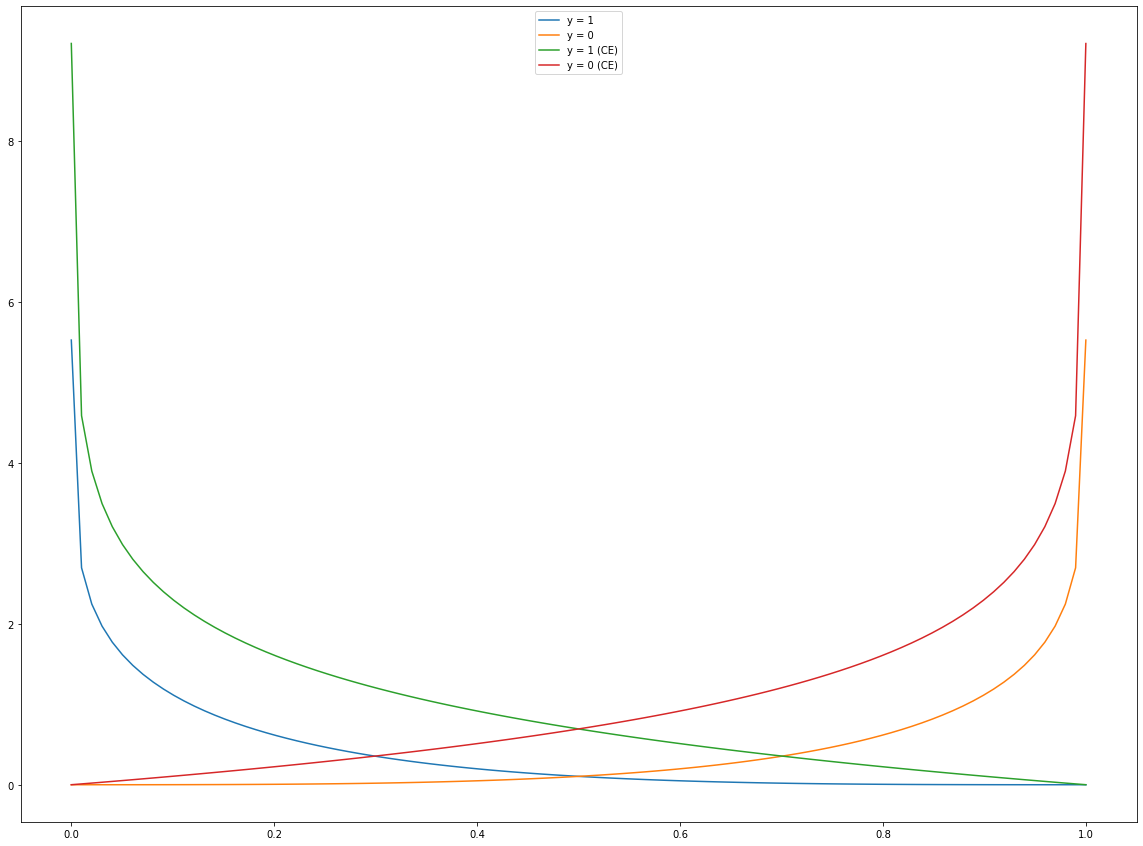

In [105]:
plt.figure(figsize=(20,15))
plt.plot(x, y1, label = 'y = 1')
plt.plot(x, y0, label = 'y = 0')
plt.plot(x, y1_ce, label = 'y = 1 (CE)')
plt.plot(x, y0_ce, label = 'y = 0 (CE)')
plt.legend()

In [46]:
import torch

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [53]:
p = torch.tensor(1.0).to(device)
y = torch.tensor(0.0).to(device)
torch.nn.functional.binary_cross_entropy(p, y)

tensor(27.6310, device='cuda:0')

In [140]:
y_true = torch.randint(low = 0, high = 2, size = (len(x), ))
y_true = y_true.type(dtype=torch.float).to(device)

In [143]:
y_true

tensor([0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
        1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
        0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 1., 1., 1.], device='cuda:0')

In [142]:
x = torch.linspace(1e-4, 1-1e-4, 100).type(dtype=torch.float).to(device)
y_bce = torch.nn.functional.binary_cross_entropy(x, y_true, reduction = 'none')
y_bce

tensor([1.0002e-04, 1.0251e-02, 2.0507e-02, 3.0869e-02, 4.1339e-02, 2.9839e+00,
        2.8019e+00, 7.3424e-02, 8.4352e-02, 2.3970e+00, 1.0657e-01, 1.1787e-01,
        1.2930e-01, 2.0296e+00, 1.9556e+00, 1.8866e+00, 1.8221e+00, 1.8848e-01,
        1.7044e+00, 1.6504e+00, 2.2575e-01, 2.3848e-01, 2.5139e-01, 1.4594e+00,
        1.4169e+00, 1.3760e+00, 3.0472e-01, 1.2991e+00, 1.2628e+00, 3.4668e-01,
        3.6107e-01, 3.7567e-01, 1.1293e+00, 1.0985e+00, 1.0687e+00, 4.3628e-01,
        1.0115e+00, 4.6803e-01, 9.5747e-01, 9.3150e-01, 5.1761e-01, 8.8151e-01,
        5.5209e-01, 8.3389e-01, 5.8781e-01, 7.8844e-01, 6.2484e-01, 6.4389e-01,
        7.2391e-01, 7.0330e-01, 6.8310e-01, 6.6330e-01, 7.4496e-01, 6.2484e-01,
        7.8844e-01, 8.1091e-01, 5.6979e-01, 8.5741e-01, 5.3471e-01, 5.1761e-01,
        5.0081e-01, 4.8428e-01, 4.6803e-01, 1.0115e+00, 1.0397e+00, 4.2078e-01,
        1.0985e+00, 1.1293e+00, 1.1610e+00, 3.6107e-01, 3.4668e-01, 1.2628e+00,
        1.2991e+00, 1.3368e+00, 1.3760e+

In [148]:
y_bce.mean()

tensor(0.8801, device='cuda:0')

In [137]:
-torch.log(torch.tensor(1e-12))

tensor(27.6310)

In [71]:
-torch.log(x)

tensor([9.2103e+00, 4.5855e+00, 3.8972e+00, 3.4934e+00, 3.2066e+00, 2.9839e+00,
        2.8019e+00, 2.6480e+00, 2.5146e+00, 2.3970e+00, 2.2917e+00, 2.1965e+00,
        2.1096e+00, 2.0296e+00, 1.9556e+00, 1.8866e+00, 1.8221e+00, 1.7615e+00,
        1.7044e+00, 1.6504e+00, 1.5991e+00, 1.5503e+00, 1.5038e+00, 1.4594e+00,
        1.4169e+00, 1.3760e+00, 1.3368e+00, 1.2991e+00, 1.2628e+00, 1.2277e+00,
        1.1938e+00, 1.1610e+00, 1.1293e+00, 1.0985e+00, 1.0687e+00, 1.0397e+00,
        1.0115e+00, 9.8413e-01, 9.5747e-01, 9.3150e-01, 9.0619e-01, 8.8151e-01,
        8.5741e-01, 8.3389e-01, 8.1091e-01, 7.8844e-01, 7.6646e-01, 7.4496e-01,
        7.2391e-01, 7.0330e-01, 6.8310e-01, 6.6330e-01, 6.4389e-01, 6.2484e-01,
        6.0615e-01, 5.8781e-01, 5.6979e-01, 5.5209e-01, 5.3471e-01, 5.1761e-01,
        5.0081e-01, 4.8428e-01, 4.6803e-01, 4.5203e-01, 4.3628e-01, 4.2078e-01,
        4.0552e-01, 3.9048e-01, 3.7567e-01, 3.6107e-01, 3.4668e-01, 3.3250e-01,
        3.1852e-01, 3.0472e-01, 2.9112e-

In [146]:
x[y_true == 1.0].shape

torch.Size([50])

In [161]:
y_bce_test = torch.cat([-torch.log(x[y_true == 1.0]), -torch.log(1-x[y_true == 0.0])])
y_bce_test

tensor([2.9839e+00, 2.8019e+00, 2.3970e+00, 2.0296e+00, 1.9556e+00, 1.8866e+00,
        1.8221e+00, 1.7044e+00, 1.6504e+00, 1.4594e+00, 1.4169e+00, 1.3760e+00,
        1.2991e+00, 1.2628e+00, 1.1293e+00, 1.0985e+00, 1.0687e+00, 1.0115e+00,
        9.5747e-01, 9.3150e-01, 8.8151e-01, 8.3389e-01, 7.8844e-01, 7.2391e-01,
        7.0330e-01, 6.8310e-01, 6.6330e-01, 6.2484e-01, 5.6979e-01, 5.3471e-01,
        5.1761e-01, 5.0081e-01, 4.8428e-01, 4.6803e-01, 4.2078e-01, 3.6107e-01,
        3.4668e-01, 2.3848e-01, 2.0075e-01, 1.8848e-01, 1.6439e-01, 1.4086e-01,
        9.5400e-02, 7.3424e-02, 6.2614e-02, 5.1920e-02, 3.0869e-02, 2.0507e-02,
        1.0251e-02, 1.0008e-04, 1.0002e-04, 1.0251e-02, 2.0507e-02, 3.0869e-02,
        4.1339e-02, 7.3424e-02, 8.4352e-02, 1.0657e-01, 1.1787e-01, 1.2930e-01,
        1.8848e-01, 2.2575e-01, 2.3848e-01, 2.5139e-01, 3.0472e-01, 3.4668e-01,
        3.6107e-01, 3.7567e-01, 4.3628e-01, 4.6803e-01, 5.1761e-01, 5.5209e-01,
        5.8781e-01, 6.2484e-01, 6.4389e-

In [162]:
y_bce_test.mean()

tensor(0.8801, device='cuda:0')

In [154]:
-torch.log(x[y_true == 1.0]).mean()

tensor(0.8725, device='cuda:0')

In [155]:
- torch.log(1-x[y_true == 0.0]).mean()

tensor(0.8876, device='cuda:0')

In [167]:
y_bce_formula = y_true * (-torch.log(x)) + (1 - y_true) * (-torch.log(1 - x))
y_bce_formula

tensor([1.0002e-04, 1.0251e-02, 2.0507e-02, 3.0869e-02, 4.1339e-02, 2.9839e+00,
        2.8019e+00, 7.3424e-02, 8.4352e-02, 2.3970e+00, 1.0657e-01, 1.1787e-01,
        1.2930e-01, 2.0296e+00, 1.9556e+00, 1.8866e+00, 1.8221e+00, 1.8848e-01,
        1.7044e+00, 1.6504e+00, 2.2575e-01, 2.3848e-01, 2.5139e-01, 1.4594e+00,
        1.4169e+00, 1.3760e+00, 3.0472e-01, 1.2991e+00, 1.2628e+00, 3.4668e-01,
        3.6107e-01, 3.7567e-01, 1.1293e+00, 1.0985e+00, 1.0687e+00, 4.3628e-01,
        1.0115e+00, 4.6803e-01, 9.5747e-01, 9.3150e-01, 5.1761e-01, 8.8151e-01,
        5.5209e-01, 8.3389e-01, 5.8781e-01, 7.8844e-01, 6.2484e-01, 6.4389e-01,
        7.2391e-01, 7.0330e-01, 6.8310e-01, 6.6330e-01, 7.4496e-01, 6.2484e-01,
        7.8844e-01, 8.1091e-01, 5.6979e-01, 8.5741e-01, 5.3471e-01, 5.1761e-01,
        5.0081e-01, 4.8428e-01, 4.6803e-01, 1.0115e+00, 1.0397e+00, 4.2078e-01,
        1.0985e+00, 1.1293e+00, 1.1610e+00, 3.6107e-01, 3.4668e-01, 1.2628e+00,
        1.2991e+00, 1.3368e+00, 1.3760e+

In [168]:
y_bce_formula.mean()

tensor(0.8801, device='cuda:0')

In [169]:
y_bce_formula == y_bce

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')

In [179]:
logit_1 = -torch.log(x)
logit_0 = -torch.log(1-x)

In [180]:
y_bce_1_loss = y_true * logit_1
y_bce_0_loss = (1-y_true) * logit_0

In [181]:
y_bce_loss = y_bce_1_loss + y_bce_0_loss
y_bce_loss

tensor([1.0002e-04, 1.0251e-02, 2.0507e-02, 3.0869e-02, 4.1339e-02, 2.9839e+00,
        2.8019e+00, 7.3424e-02, 8.4352e-02, 2.3970e+00, 1.0657e-01, 1.1787e-01,
        1.2930e-01, 2.0296e+00, 1.9556e+00, 1.8866e+00, 1.8221e+00, 1.8848e-01,
        1.7044e+00, 1.6504e+00, 2.2575e-01, 2.3848e-01, 2.5139e-01, 1.4594e+00,
        1.4169e+00, 1.3760e+00, 3.0472e-01, 1.2991e+00, 1.2628e+00, 3.4668e-01,
        3.6107e-01, 3.7567e-01, 1.1293e+00, 1.0985e+00, 1.0687e+00, 4.3628e-01,
        1.0115e+00, 4.6803e-01, 9.5747e-01, 9.3150e-01, 5.1761e-01, 8.8151e-01,
        5.5209e-01, 8.3389e-01, 5.8781e-01, 7.8844e-01, 6.2484e-01, 6.4389e-01,
        7.2391e-01, 7.0330e-01, 6.8310e-01, 6.6330e-01, 7.4496e-01, 6.2484e-01,
        7.8844e-01, 8.1091e-01, 5.6979e-01, 8.5741e-01, 5.3471e-01, 5.1761e-01,
        5.0081e-01, 4.8428e-01, 4.6803e-01, 1.0115e+00, 1.0397e+00, 4.2078e-01,
        1.0985e+00, 1.1293e+00, 1.1610e+00, 3.6107e-01, 3.4668e-01, 1.2628e+00,
        1.2991e+00, 1.3368e+00, 1.3760e+

In [182]:
y_bce_loss.mean()

tensor(0.8801, device='cuda:0')

In [183]:
y_bce_loss == y_bce

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True], device='cuda:0')

In [308]:
def calc_focal_loss2(prob_y, y, gamma):
    '''
    Formula 5 from
    Lin, Tsung-Yi, Priya Goyal, Ross Girshick, Kaiming He, and Piotr
    Dollár. “Focal Loss for Dense Object Detection.” arXiv, February 7,
    2018. http://arxiv.org/abs/1708.02002.
    '''
    logit      = -torch.log(prob_y)
    bce_loss   = logit * y
    focal_loss = bce_loss * (1 - prob_y)**gamma

    return focal_loss


def calc_binary_focal_loss2(input_list, target_list, alpha = 0.8, gamma = 2.0):
    # Convert it to probability
    prob_list = input_list.sigmoid()

    # Compute focal loss as if all targets are labeled as 1, aka peaks...
    focal_loss_1 = calc_focal_loss2(prob_list, target_list, gamma)

    # Compute focal loss as if all targets are labeled as 0, aka non peaks...
    focal_loss_0 = calc_focal_loss2(1-prob_list, 1-target_list, gamma)

    # Compute the total focal loss
    binary_focal_loss = alpha * focal_loss_1 + focal_loss_0

    return binary_focal_loss.mean()


In [309]:
calc_binary_focal_loss2(x, y_true, alpha = 0.8, gamma = 2.0)

tensor(0.2245, device='cuda:0')

tricks to avoid nan

simplify:
log(1 + exp(-x)) = log(exp(0) + exp(-x))

trick: 
log(exp(x1) + exp(x2)) = a + log(exp(x1-a) + exp(x2-a)), where a = max(x1, x2)

so:
log(exp(0) + exp(-x)) = log(exp(x1) + exp(x2)), where x1 = 0 and x2 = -x
= a + log(exp(0-a) + exp(-x-a))

conclusion:
log(1 + exp(-x)) = a + log(exp(0-a) + exp(-x-a))

In [317]:
# def calc_focal_loss_with_logits(x, y, gamma):
#     '''
#     Formula 5 from
#     Lin, Tsung-Yi, Priya Goyal, Ross Girshick, Kaiming He, and Piotr
#     Dollár. “Focal Loss for Dense Object Detection.” arXiv, February 7,
#     2018. http://arxiv.org/abs/1708.02002.

#     Also, the logit calculation that doesn't explode in gradients.

#     Firstly, logit = -log(1 / (1-exp(-x)))
#                    = log(1 + exp(-x))

#     Then,
#     ~~~math
#     simplify:
#     log(1 + exp(-x)) = log(exp(0) + exp(-x))

#     trick: 
#     log(exp(x1) + exp(x2)) = a + log(exp(x1-a) + exp(x2-a)), where a = max(x1, x2)

#     so:
#     log(exp(0) + exp(-x)) = log(exp(x1) + exp(x2)), where x1 = 0 and x2 = -x
#     = a + log(exp(0-a) + exp(-x-a))

#     conclusion:
#     log(1 + exp(-x)) = a + log(exp(0-a) + exp(-x-a))
#     ~~~

#     Finally,
#     logit = a + log( exp(-a) + exp(-x-a) ), where a = max(0, -x)
#     '''
#     ## a = torch.max(torch.tensor(0), -x)
#     a = (-x).clamp(min = 0)
#     logit = a + ( (-a).exp() + (-x-a).exp() ).log()
    
#     prob_y = (-logit).exp()

#     bce_loss   = logit * y
#     focal_loss = bce_loss * (1 - prob_y)**gamma

#     return focal_loss

def calc_binary_bce_loss(x, y):
    '''
    Formula 5 from
    Lin, Tsung-Yi, Priya Goyal, Ross Girshick, Kaiming He, and Piotr
    Dollár. “Focal Loss for Dense Object Detection.” arXiv, February 7,
    2018. http://arxiv.org/abs/1708.02002.

    Also, the logit calculation that doesn't explode in gradients.

    Firstly, logit = -log(1 / (1-exp(-x)))
                   = log(1 + exp(-x))

    Then,
    ~~~math
    simplify:
    log(1 + exp(-x)) = log(exp(0) + exp(-x))

    trick: 
    log(exp(x1) + exp(x2)) = a + log(exp(x1-a) + exp(x2-a)), where a = max(x1, x2)

    so:
    log(exp(0) + exp(-x)) = log(exp(x1) + exp(x2)), where x1 = 0 and x2 = -x
    = a + log(exp(0-a) + exp(-x-a))

    conclusion:
    log(1 + exp(-x)) = a + log(exp(0-a) + exp(-x-a))
    ~~~

    Finally,
    logit = a + log( exp(-a) + exp(-x-a) ), where a = max(0, -x)
    '''
    ## a = torch.max(torch.tensor(0), -x)
    a = (-x).clamp(min = 0)
    logit = a + ( (-a).exp() + (-x-a).exp() ).log()
    
    binary_focal_loss = logit + (1 - y) * x

    return binary_focal_loss.mean()

In [318]:
calc_binary_bce_loss(x, y_true, gamma = 2.0, alpha = 0.8)

tensor(0.7250, device='cuda:0')

In [321]:
torch.nn.functional.binary_cross_entropy_with_logits(x, y_true)

tensor(0.7250, device='cuda:0')

In [322]:
def calc_binary_focal_loss_with_logits(x, y, alpha = 0.8, gamma = 2.0):
    '''
    Formula 5 from
    Lin, Tsung-Yi, Priya Goyal, Ross Girshick, Kaiming He, and Piotr
    Dollár. “Focal Loss for Dense Object Detection.” arXiv, February 7,
    2018. http://arxiv.org/abs/1708.02002.

    Also, the logit calculation that doesn't explode in gradients.

    Firstly, logit = -log(1 / (1-exp(-x)))
                   = log(1 + exp(-x))

    Then,
    ~~~math1
    simplify:
    log(1 + exp(-x)) = log(exp(0) + exp(-x))

    trick: 
    log(exp(x1) + exp(x2)) = a + log(exp(x1-a) + exp(x2-a)), where a = max(x1, x2)

    so:
    log(exp(0) + exp(-x)) = log(exp(x1) + exp(x2)), where x1 = 0 and x2 = -x
    = a + log(exp(0-a) + exp(-x-a))

    conclusion:
    log(1 + exp(-x)) = a + log(exp(0-a) + exp(-x-a))
    ~~~

    Finally,
    logit = a + log( exp(-a) + exp(-x-a) ), where a = max(0, -x)
    
    Calculate focal loss,
    binary_focal_loss = alpha * y * (1 - p)**gamma * logit +
                        (1 - y) * p**gamma * x             +
                        p**gamma * (1 - y) * logit
    '''
    a = (-x).clamp(min = 0)
    logit = a + ( (-a).exp() + (-x-a).exp() ).log()
    
    p = (-logit).exp()
    
    binary_focal_loss = alpha * y * (1 - p)**gamma * logit + \
                        (1 - y) * p**gamma * x             + \
                        p**gamma * (1 - y) * logit

    return binary_focal_loss.mean()

In [308]:
def calc_focal_loss2(prob_y, y, gamma):
    '''
    Formula 5 from
    Lin, Tsung-Yi, Priya Goyal, Ross Girshick, Kaiming He, and Piotr
    Dollár. “Focal Loss for Dense Object Detection.” arXiv, February 7,
    2018. http://arxiv.org/abs/1708.02002.
    '''
    logit      = -torch.log(prob_y)
    bce_loss   = logit * y
    focal_loss = bce_loss * (1 - prob_y)**gamma

    return focal_loss


def calc_binary_focal_loss2(input_list, target_list, alpha = 0.8, gamma = 2.0):
    # Convert it to probability
    prob_list = input_list.sigmoid()

    # Compute focal loss as if all targets are labeled as 1, aka peaks...
    focal_loss_1 = calc_focal_loss2(prob_list, target_list, gamma)

    # Compute focal loss as if all targets are labeled as 0, aka non peaks...
    focal_loss_0 = calc_focal_loss2(1-prob_list, 1-target_list, gamma)

    # Compute the total focal loss
    binary_focal_loss = alpha * focal_loss_1 + focal_loss_0

    return binary_focal_loss.mean()


In [323]:
calc_binary_focal_loss2(x, y_true, alpha = 0.8, gamma = 2.0)

tensor(0.2245, device='cuda:0')

In [324]:
calc_binary_focal_loss_with_logits(x, y_true, alpha = 0.8, gamma = 2.0)

tensor(0.2245, device='cuda:0')

In [294]:
a = (-x).clamp(min = 0)
logit1 = a + ( (-a).exp() + (-x-a).exp() ).log()
logit1

tensor([0.6931, 0.6881, 0.6830, 0.6781, 0.6731, 0.6682, 0.6633, 0.6584, 0.6535,
        0.6487, 0.6439, 0.6391, 0.6343, 0.6296, 0.6249, 0.6202, 0.6156, 0.6109,
        0.6063, 0.6018, 0.5972, 0.5927, 0.5882, 0.5837, 0.5792, 0.5748, 0.5704,
        0.5660, 0.5617, 0.5574, 0.5531, 0.5488, 0.5445, 0.5403, 0.5361, 0.5319,
        0.5278, 0.5236, 0.5195, 0.5154, 0.5114, 0.5074, 0.5034, 0.4994, 0.4954,
        0.4915, 0.4876, 0.4837, 0.4798, 0.4760, 0.4722, 0.4684, 0.4646, 0.4609,
        0.4572, 0.4535, 0.4498, 0.4462, 0.4425, 0.4389, 0.4354, 0.4318, 0.4283,
        0.4248, 0.4213, 0.4178, 0.4144, 0.4110, 0.4076, 0.4042, 0.4009, 0.3975,
        0.3942, 0.3910, 0.3877, 0.3845, 0.3813, 0.3781, 0.3749, 0.3717, 0.3686,
        0.3655, 0.3624, 0.3594, 0.3563, 0.3533, 0.3503, 0.3474, 0.3444, 0.3415,
        0.3386, 0.3357, 0.3328, 0.3300, 0.3271, 0.3243, 0.3215, 0.3188, 0.3160,
        0.3133], device='cuda:0')

In [295]:
logit2 = - x.sigmoid().log()
logit2

tensor([0.6931, 0.6881, 0.6830, 0.6781, 0.6731, 0.6682, 0.6633, 0.6584, 0.6535,
        0.6487, 0.6439, 0.6391, 0.6343, 0.6296, 0.6249, 0.6202, 0.6156, 0.6109,
        0.6063, 0.6018, 0.5972, 0.5927, 0.5882, 0.5837, 0.5792, 0.5748, 0.5704,
        0.5660, 0.5617, 0.5574, 0.5531, 0.5488, 0.5445, 0.5403, 0.5361, 0.5319,
        0.5278, 0.5236, 0.5195, 0.5154, 0.5114, 0.5074, 0.5034, 0.4994, 0.4954,
        0.4915, 0.4876, 0.4837, 0.4798, 0.4760, 0.4722, 0.4684, 0.4646, 0.4609,
        0.4572, 0.4535, 0.4498, 0.4462, 0.4425, 0.4389, 0.4354, 0.4318, 0.4283,
        0.4248, 0.4213, 0.4178, 0.4144, 0.4110, 0.4076, 0.4042, 0.4009, 0.3975,
        0.3942, 0.3910, 0.3877, 0.3845, 0.3813, 0.3781, 0.3749, 0.3717, 0.3686,
        0.3655, 0.3624, 0.3594, 0.3563, 0.3533, 0.3503, 0.3474, 0.3444, 0.3415,
        0.3386, 0.3357, 0.3328, 0.3300, 0.3271, 0.3243, 0.3215, 0.3188, 0.3160,
        0.3133], device='cuda:0')

In [279]:
torch.allclose(logit1,logit2)

True